# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Perform API Calls

In [7]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pevek
Processing Record 2 of Set 1 | suleja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=suleja
Processing Record 3 of Set 1 | aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aksu
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=punta%20arenas
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rikitea
Processing Record 6 of Set 1 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=qaqortoq
Processing Record 7 of Set 1 | hermanu

Processing Record 3 of Set 2 | lokachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lokachi
Processing Record 4 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint%20george
Processing Record 5 of Set 2 | cruzeiro do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cruzeiro%20do%20sul
Processing Record 6 of Set 2 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tsihombe
City not found. Skipping...
Processing Record 7 of Set 2 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tocopilla
Processing Record 8 of Set 2 | kuva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kuva
City not found. Skipping...
Processing R

Processing Record 6 of Set 3 | sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sri%20aman
Processing Record 7 of Set 3 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tuatapere
Processing Record 8 of Set 3 | kisanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kisanga
Processing Record 9 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 3 | ciudad bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ciudad%20bolivar
Processing Record 11 of Set 3 | kamyshevatskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kamyshevatskaya
Processing Record 12

Processing Record 8 of Set 4 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=north%20bend
Processing Record 9 of Set 4 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=leningradskiy
Processing Record 10 of Set 4 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=college
Processing Record 11 of Set 4 | weiden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=weiden
Processing Record 12 of Set 4 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ixtapa
Processing Record 13 of Set 4 | pyay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pyay
Processing Record 14 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weathe

Processing Record 11 of Set 5 | bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bontang
Processing Record 12 of Set 5 | heiligenhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=heiligenhafen
Processing Record 13 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=torbay
Processing Record 14 of Set 5 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=norman%20wells
Processing Record 15 of Set 5 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=northam
Processing Record 16 of Set 5 | emet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=emet
Processing Record 17 of Set 5 | lompoc
http://api.openweathermap.org/data/2.5/

Processing Record 13 of Set 6 | saiha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saiha
Processing Record 14 of Set 6 | grafton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=grafton
Processing Record 15 of Set 6 | tiruvottiyur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tiruvottiyur
City not found. Skipping...
Processing Record 16 of Set 6 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=asau
City not found. Skipping...
Processing Record 17 of Set 6 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port%20blair
Processing Record 18 of Set 6 | bastia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bastia
Processing Record 19 of Set 6 | 

Processing Record 15 of Set 7 | porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=porbandar
Processing Record 16 of Set 7 | mayahi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mayahi
Processing Record 17 of Set 7 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=la%20ronge
Processing Record 18 of Set 7 | hibbing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hibbing
Processing Record 19 of Set 7 | secunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=secunda
Processing Record 20 of Set 7 | tingrela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tingrela
City not found. Skipping...
Processing Record 21 of Set 7 | charters towers
http://api

Processing Record 18 of Set 8 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sorland
Processing Record 19 of Set 8 | wau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wau
City not found. Skipping...
Processing Record 20 of Set 8 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=isangel
Processing Record 21 of Set 8 | deder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=deder
Processing Record 22 of Set 8 | la rochelle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=la%20rochelle
Processing Record 23 of Set 8 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vangaindrano
Processing Record 24 of Set 8 | firozpur
http://api.openwe

Processing Record 21 of Set 9 | kyabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kyabe
Processing Record 22 of Set 9 | naifaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=naifaru
Processing Record 23 of Set 9 | petrolina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=petrolina
Processing Record 24 of Set 9 | penzance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=penzance
Processing Record 25 of Set 9 | palafrugell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=palafrugell
Processing Record 26 of Set 9 | kurumkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kurumkan
Processing Record 27 of Set 9 | fushan
http://api.openweathermap.org/data/2.5/weat

Processing Record 24 of Set 10 | palia kalan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=palia%20kalan
Processing Record 25 of Set 10 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=adrar
Processing Record 26 of Set 10 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lolua
City not found. Skipping...
Processing Record 27 of Set 10 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fare
Processing Record 28 of Set 10 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sao%20paulo%20de%20olivenca
Processing Record 29 of Set 10 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=martapura
Processing Record 30 of Se

Processing Record 27 of Set 11 | khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khonuu
City not found. Skipping...
Processing Record 28 of Set 11 | fort pierce
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fort%20pierce
Processing Record 29 of Set 11 | san francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20francisco
Processing Record 30 of Set 11 | cumpas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cumpas
Processing Record 31 of Set 11 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yanam
Processing Record 32 of Set 11 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=henties%20bay
Processing Record 33 of Set 11 | f

Processing Record 28 of Set 12 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ucluelet
Processing Record 29 of Set 12 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sola
Processing Record 30 of Set 12 | cuenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cuenca
Processing Record 31 of Set 12 | waterloo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=waterloo
Processing Record 32 of Set 12 | muromtsevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=muromtsevo
Processing Record 33 of Set 12 | minab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=minab
Processing Record 34 of Set 12 | esso
http://api.openweathermap.org/data/2.5/weather?units

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,0,RU,1523127272,76,69.70,170.27,-6.93,3.94
1,suleja,0,NG,1523127273,57,9.18,7.18,86.58,3.60
2,aksu,90,KZ,1523124000,80,52.04,76.93,39.20,6.71
3,punta arenas,40,CL,1523124000,75,-53.16,-70.91,44.60,23.04
4,rikitea,36,PF,1523127264,100,-23.12,-134.97,75.52,4.83


## Latitude vs Temperature Plot

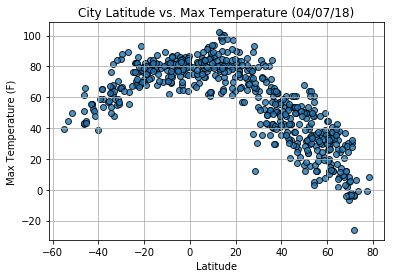

In [10]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

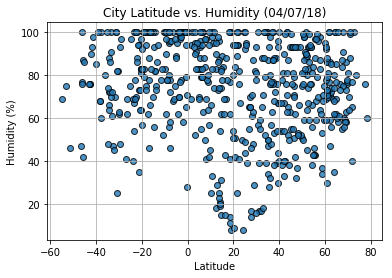

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

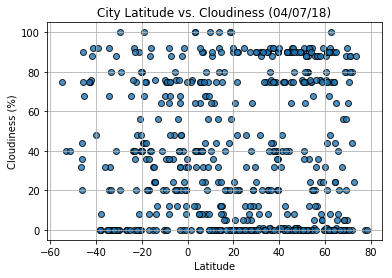

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

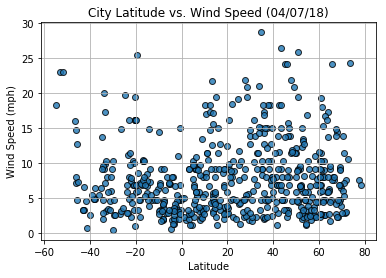

In [13]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()